# Dynamic Mode Decomposition DMD

<br>
<br>
<br>
<br>
<br>
<br>


## DMD with GitHub function

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys 

sys.path.append("py-optDMD-master")
import pydmd
from pydmd.dmdbase import DMDBase

t = np.arange(1845,1903+2,2)      # year
SH = np.array([20,20,52,83,64,68,83,12,36,150,110,60,7,10,70,100,92,70,10,11,137,137,18,22,52,83,18,10,9,65])
CL = np.array([32,50,12,10,13,36,15,12,6,6,65,70,40,9,20,34,45,40,15,15,60,80,26,18,37,50,35,12,12,25])

plt.plot(t,SH)
plt.plot(t,CL)
plt.legend(['Snowshoe Hare','Canada Lynx'])
plt.grid()

In [ ]:
from optimalDMD import * 

X = np.zeros((2,len(SH)))

X[0,:] = SH[0:]
X[1,:] = CL[0:]

t_2 = np.reshape(t,(1,len(t)))

r=2
imode=1
w,e,b=optdmd(X,t_2,r,imode)

#print(w)
#print(e)
#print(b)

x_new = np.zeros((2,len(t)))

e = np.reshape(e,(len(e),1))
x_new = w@np.diag(b)@np.exp(e@t_2)

plt.figure()
plt.plot(t, x_new[0,:])
plt.plot(t, x_new[1,:])


In [ ]:
plt.figure()


for i in range(r):
    plt.plot(np.real(e[i]),np.imag(e[i]), marker = '*', markersize = 10, color = 'red')


plt.grid()

<br>
<br>
<br>

# DMD Bagging 

In [ ]:
from random import sample

X = np.zeros((2,len(SH)))

X[0,:] = SH[0:]
X[1,:] = CL[0:]

t_2 = np.reshape(t,(1,len(t)))

r=2
imode=1
n = 30
k=15
index_list = list(np.arange(0,n,1))

print(index_list)


number_of_bagging =1000
e_total = np.zeros((2,number_of_bagging))


random_indexes = sample(index_list, k)
random_indexes = np.sort(random_indexes)

print(random_indexes)

for i in range(number_of_bagging):
   random_indexes = sample(index_list, k)
   X_red = X[:,random_indexes]
   t_red = t_2[:,random_indexes]
   w,e,b=optdmd(X,t_2,r,imode)
   e_total[:,i] = e



In [ ]:
plt.figure()

for i in range(number_of_bagging):
    plt.plot(np.real(e_total[:,i]),np.imag(e_total[:,i]),'*');


<br>
<br>
<br>
<br>

# Time Delayed DMD

In [ ]:
number_of_time_delays = 5
X_td = np.zeros(((number_of_time_delays+1)*2,len(SH)-number_of_time_delays))

for i in range(number_of_time_delays+1):
    X_td[i,:] = SH[i:len(SH)-number_of_time_delays+i]
    X_td[i+number_of_time_delays+1,:]=CL[i:len(CL)-number_of_time_delays+i]

print(X_td.shape)
t_td = t_2[:,0:-number_of_time_delays]
print(t_td.shape)
imode = 1
r = 6
w,e,b=optdmd(X_td,t_td,r,imode)

x_new = np.zeros((2,len(t)))

e = np.reshape(e,(len(e),1))
x_new = w@np.diag(b)@np.exp(e@t_2)
print(x_new.shape)



plt.figure()
plt.plot(t, x_new[0,:])
plt.plot(t, SH[:])


plt.figure()
plt.plot(t, x_new[number_of_time_delays+1,:])
plt.plot(t, CL[:])

In [ ]:
print(e)

# SINDY



In [1]:
import pysindy as ps
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys 

sys.path.append("py-optDMD-master")
import pydmd
from pydmd.dmdbase import DMDBase

t = np.arange(1845,1903+2,2) 
t = np.arange(0,30,1)     
SH = np.array([20,20,52,83,64,68,83,12,36,150,110,60,7,10,70,100,92,70,10,11,137,137,18,22,52,83,18,10,9,65])
CL = np.array([32,50,12,10,13,36,15,12,6,6,65,70,40,9,20,34,45,40,15,15,60,80,26,18,37,50,35,12,12,25])
X = np.zeros((len(SH),2))


In [2]:
differentiation_method = ps.FiniteDifference(order=2)
feature_library = ps.PolynomialLibrary(degree=10)
optimizer = ps.STLSQ(threshold=0.2)


In [3]:
model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"]
)

model.fit(X, t=t)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=10), feature_names=['x', 'y'],
      optimizer=STLSQ(threshold=0.2))

In [4]:
x0 = X[0,0]
y0 = X[0,1]

t_test = np.arange(1845,1903+2,2)  
sim = model.simulate([x0, y0], t=t_test)

NameError: name 'x_test' is not defined

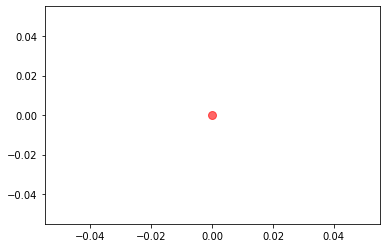

In [5]:
plt.figure()
plt.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

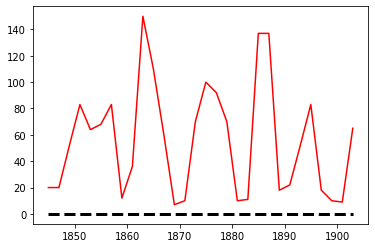

In [6]:
plt.figure()
plt.plot(t_test,SH,'r')
plt.plot(t_test, sim[:,0],"k--", label="SINDy model", linewidth=3)
